In [1]:
import numpy as np
import scipy as sci
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
from nilearn import plotting as ni_plt
from sklearn.metrics import r2_score

import json, pickle
from tqdm import tqdm
import sys, os, pdb
import pandas as pd

from src.data_utils import ECoG_Data
import src.manifold_u as mu
import fig_utils as figu
import importlib
importlib.reload(mu)
import fig_utils as figu
importlib.reload(figu)

plt.style.use(['science', 'retro'])
sns.set_style("ticks")
plt.rcParams.update({"font.size": 10})

In [2]:
movement_colors, day_colors, participant_colors, exp_class_colors, exp_participant_colors, freq_colors = mu.get_all_colors()

In [3]:
filepath = '/home/zsteineh/research_projects/NaturalisticNeuralManifolds/experiment_params/'
file_name = 'exp_params_nat_pca.json'
try:
    json_filename = filepath + file_name
except IndexError:
    raise SystemExit(f"Usage: {sys.argv[0]} <json file of experiment parameters>")
with open(json_filename) as f:
    exp_params = json.load(f)
print(exp_params['comment'])

Param file for running PCA pipeline on naturalistic data


In [4]:
freq_bands = exp_params["freq_bands"]
class_dict = exp_params["class_dict"]
class_dict = {int(cur_key): val for cur_key, val in class_dict.items()}
class_color = exp_params["class_color"]
class_color = {int(cur_key): val for cur_key, val in class_color.items()}

proj_mat_sp = exp_params["sp"] + exp_params["dataset"] + exp_params["experiment_folder"]

percent_threshold = 0.8
pats_ids_in = exp_params["pats_ids_in"]
days_tested = exp_params["test_day"]

cur_freq = 'Beta'
cur_freq_ind = 2
freq_red_dim = 10

In [5]:
data_slice_fig_path = '/home/zsteineh/research_projects/neural_manifolds/scripts/final_scripts/journal_figures/Q4_data_slice.png'
data_slice = plt.imread(data_slice_fig_path)

In [6]:
cross_pat_pas = pickle.load(open(proj_mat_sp + 'freq_cross_pat_pas.pkl', 'rb'))
print(cross_pat_pas.keys())

cross_pat_nd_df = pd.read_csv(proj_mat_sp + 'freq_cross_pat_nd_df.csv')
cross_pat_nd_df

dict_keys(['LFO', 'Alpha', 'Beta', 'Low Gamma', 'Gamma', 'High Gamma'])


,Unnamed: 0,Frequency,Movement,Participant Comparison,First Participant Day,Second Participant Day,Electrode Overlap,Neural Dissimilarity
0,0,LFO,left,P01 vs P02,3,3,0.438662,0.493537
1,1,LFO,left,P01 vs P02,3,4,0.438662,0.466339
2,2,LFO,left,P01 vs P02,3,5,0.438662,0.507696
3,3,LFO,left,P01 vs P02,3,6,0.438662,0.470691
4,4,LFO,left,P01 vs P02,3,7,0.438662,NaN
...,...,...,...,...,...,...,...,...
303595,6595,High Gamma,up,P11 vs P12,7,3,0.473318,0.309033
303596,6596,High Gamma,up,P11 vs P12,7,4,0.473318,0.299223
303597,6597,High Gamma,up,P11 vs P12,7,5,0.473318,0.311777
303598,6598,High Gamma,up,P11 vs P12,7,6,0.473318,0.294776


In [7]:
null_data_pa = np.load(exp_params['cross_pat_null_pa_lp'] + 'TME_null_pas', allow_pickle=True)
null_data_pa = np.array(null_data_pa)
print(null_data_pa.shape)

(1, 5, 1000, 1, 1, 66, 15)


In [8]:
null_vals = cross_pat_nd_df[(cross_pat_nd_df['Frequency'] == 'Null')]['Neural Dissimilarity'].values
null_vals = null_vals[~np.isnan(null_vals)]
sigf_val = np.percentile(null_vals, 1, axis=0)
print(sigf_val)

0.7784360326554797


In [9]:
all_sbjs_pca = []
for f, freq in enumerate(freq_bands):
    cur_pca = np.load(proj_mat_sp + freq + '_pca_objects.npy', allow_pickle=True)
    all_sbjs_pca.append(cur_pca)
all_sbjs_pca = np.array(all_sbjs_pca)
print(all_sbjs_pca.shape)

(6, 12, 5, 5)


## Make the plot

In [10]:
# actually compares over all days and all participants
all_days_all_sbjs_list = []
for s, sbj in enumerate(pats_ids_in):
    for d, day in enumerate(days_tested):
        cur_comp = sbj + " day " + str(day)
        all_days_all_sbjs_list.append(cur_comp)

sbj_days_comps = mu.get_pa_comparison_names(all_days_all_sbjs_list)

short_sbj_days_comps = [sbj_days_comps[comp].split(' ')[0] + ' vs ' + sbj_days_comps[comp].split(' ')[4] for comp in sbj_days_comps]

/home/zsteineh/research_projects/NaturalisticNeuralManifolds/figures/fig_utils.py:113: RuntimeWarning: Mean of empty slice
  theta_vals = np.nanmean(all_day_pas[frequency], axis=0)[comp, ...]
/home/zsteineh/anaconda3/envs/ECoGDL_venv/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1667: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/home/zsteineh/research_projects/NaturalisticNeuralManifolds/figures/fig_utils.py:113: RuntimeWarning: Mean of empty slice
  theta_vals = np.nanmean(all_day_pas[frequency], axis=0)[comp, ...]
/home/zsteineh/anaconda3/envs/ECoGDL_venv/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1667: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/home/zsteineh/research_projects/NaturalisticNeuralManifolds/figures/fig_utils.py:113: RuntimeWarning: Mean of empty slice
  theta_vals = np.nanmean(all_day_pas[frequency], axis=0)[comp, ...]
/home/zsteineh/anaconda3/envs/ECoGDL_venv/lib/python3.7/site-packages/numpy/

electrode vs dissimilarity p value:  0.0


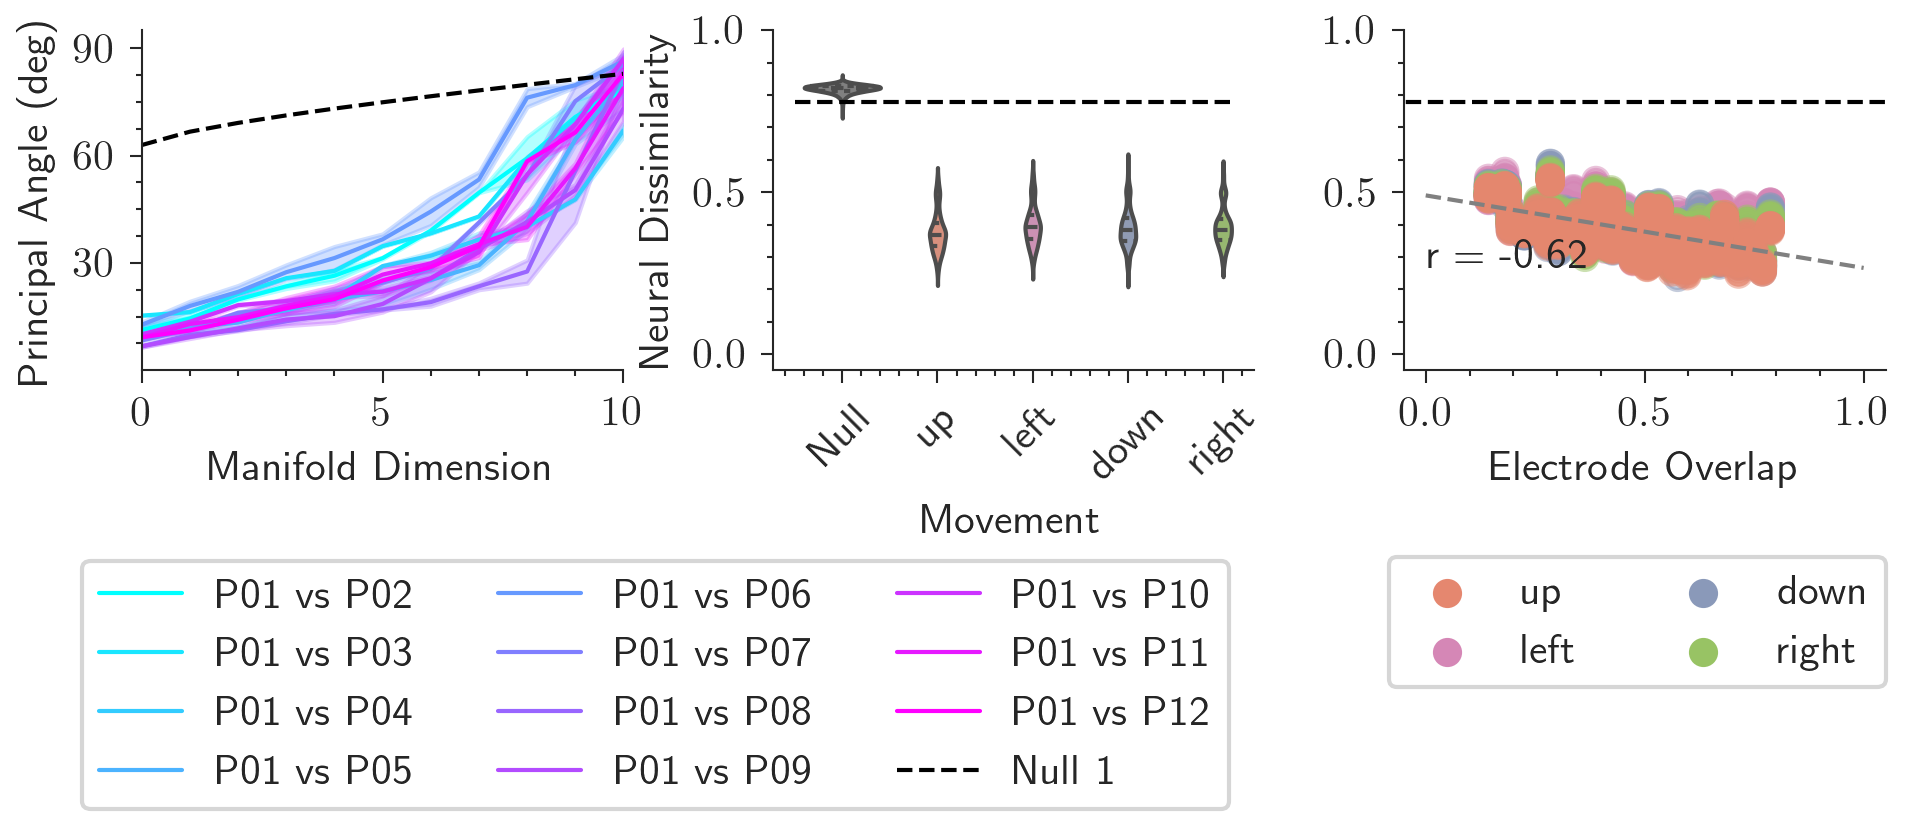

In [22]:
fig, axes = plt.subplots(figsize=(7.5, 1.5), nrows=1, ncols=3, dpi = 300)
plt.rcParams.update({"font.size": 10})
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.31, hspace=None)

comps_to_plot = [5, 10, 14, 19, 24, 29, 34, 39, 44, 49, 54]
# remove the rest data (freqs, days, mvmts, sbj_comps, red_dims)
cross_sbjs_pa = cross_pat_pas['Beta']
cross_sbjs_pa = cross_sbjs_pa[1:, ...]
null_pa = np.squeeze(np.array(null_data_pa[0]))
signf_null_pas = np.percentile(np.mean(null_pa, axis=0), 1, axis=0).mean(axis=0)
figu.plot_PAs(axes[0], 
        short_sbj_days_comps, 
        comps_to_plot, 
        np.expand_dims(cross_sbjs_pa, axis=0), 
        null_data_pa, 
        freq_red_dim,
        null_sig_pas = signf_null_pas, 
        cross_pat = True,
        fill_between = True)

Q4_filt_data = cross_pat_nd_df[(cross_pat_nd_df['Frequency'].isin([cur_freq, 'Null']))]
order=['Null', 'up', 'left', 'down', 'right']
sns.violinplot(x='Movement', 
                y='Neural Dissimilarity', 
                data=Q4_filt_data, 
                inner='quartile', 
                palette=movement_colors,
                order=order,
                ax=axes[1],
                )
axes[1].hlines(sigf_val, -0.5, 4.1, linestyles="dashed", color="black", label='Null')
axes[1].set_xticklabels(labels=order, rotation=45)
axes[1].spines["top"].set_visible(False)
axes[1].spines["right"].set_visible(False)
axes[1].set_ylabel('')
# axes[1].set_title("A) Manifold Dissimilarity for the\nSame Movement Across Participants")
axes[1].set_ylim([-0.05, 1])
axes[1].set_ylabel('Neural Dissimilarity')

# im_ax = axes[1].inset_axes([1.1, 0.55, 0.47, 0.47])
# im_ax.imshow(data_slice)
# im_ax.axis('off')

# filter out null data first
Q4_filt_data = cross_pat_nd_df[(cross_pat_nd_df['Frequency'].isin([cur_freq]))]

axes[2].scatter(x=Q4_filt_data['Electrode Overlap'],  
                y=Q4_filt_data['Neural Dissimilarity'],
                c=Q4_filt_data['Movement'].map(movement_colors), 
                alpha=0.5)
for mvmt in order[1:]:
    axes[2].scatter([], [], c=movement_colors[mvmt], label=mvmt)
axes[2].legend(bbox_to_anchor=(1.0, -0.55), frameon=True, borderaxespad=0., ncol=2)

# add in line of best fit
y_true = Q4_filt_data['Electrode Overlap'].values
y_pred = Q4_filt_data['Neural Dissimilarity'].values
nan_inds = ~np.isnan(y_pred)
y_pred = y_pred[nan_inds]
y_true = y_true[nan_inds]
slope, intercept = np.polyfit(y_true, y_pred, 1)
# r2 = r2_score(y_true, y_pred)
from scipy import stats
r2, p_val = stats.pearsonr(y_true, y_pred)
print("electrode vs dissimilarity p value: ", p_val)
x = np.linspace(0, 1, 100)
axes[2].plot(x, slope*x + intercept, color='grey', linestyle='--')
axes[2].text(0.05, 0.3, f'r = {r2:.2f}', transform=axes[2].transAxes)

axes[2].set_xlabel('Electrode Overlap')
axes[2].set_xlim([-0.05, 1.05])
axes[2].set_ylim([-0.05, 1])
axes[2].spines["top"].set_visible(False)
axes[2].spines["right"].set_visible(False)
axes[2].hlines(sigf_val, -0.5, 4.1, linestyles="dashed", color="black", label='Null')

plt.savefig("/home/zsteineh/research_projects/NaturalisticNeuralManifolds/figures/saved_figures/cross_pat_results.svg", format="svg", bbox_inches="tight")
plt.show()

### Get the reporting numbers

In [12]:
avg_pas = np.nanmean(cross_pat_pas['Beta'], axis=(0, 1))
std_pas = np.nanstd(cross_pat_pas['Beta'], axis=(0, 1))
print("First PA Average: ", avg_pas[0])
print("First PA STD: ", std_pas[0])
print("Last PA Average: ", avg_pas[-1])
print("Last PA STD: ", std_pas[-1])

First PA Average:  9.825865033852658
First PA STD:  2.221762656999608
Last PA Average:  81.68974845554877
Last PA STD:  8.214730222678513


In [13]:
avg_pat_nd = Q4_filt_data['Neural Dissimilarity'].mean()
std_pat_nd = Q4_filt_data['Neural Dissimilarity'].std()
print("Average Cross Pat Neural Dissimilarity: ", avg_pat_nd)
print("STD Cross Pat Neural Dissimilarity: ", std_pat_nd)

Average Cross Pat Neural Dissimilarity:  0.38847691527908257
STD Cross Pat Neural Dissimilarity:  0.06078493095361149


In [14]:
print("Average electrode overlap:", Q4_filt_data['Electrode Overlap'].mean())
print("STD electrode overlap:", Q4_filt_data['Electrode Overlap'].std())

Average electrode overlap: 0.4603973993256305
STD electrode overlap: 0.16350522468470274


In [15]:
print("Null 1% Significance:", sigf_val)

Null 1% Significance: 0.7784360326554797


## Make ROI Contribution Plots

In [16]:
exp_params['test_day'] = 'last'
manifold_ECoG_data = ECoG_Data(exp_params, proj_mat_sp)
roi_centroids = manifold_ECoG_data.roi_centroids

Determining ROIs


  0%|          | 0/12 [00:00<?, ?it/s]

ROIs found
Number of ROIs:  311
loading steve data
Pulling out last for test day


  8%|▊         | 1/12 [00:08<01:34,  8.60s/it]

loading steve data
Pulling out last for test day


 17%|█▋        | 2/12 [00:11<01:08,  6.88s/it]

loading steve data
Pulling out last for test day


 25%|██▌       | 3/12 [00:18<01:01,  6.89s/it]

loading steve data
Pulling out last for test day


 33%|███▎      | 4/12 [00:21<00:47,  5.90s/it]

loading steve data
Pulling out last for test day


 42%|████▏     | 5/12 [00:25<00:36,  5.19s/it]

loading steve data
Pulling out last for test day


 50%|█████     | 6/12 [00:36<00:40,  6.81s/it]

loading steve data
Pulling out last for test day


 58%|█████▊    | 7/12 [00:43<00:34,  6.96s/it]

loading steve data
Pulling out last for test day


 67%|██████▋   | 8/12 [00:57<00:36,  9.07s/it]

loading steve data
Pulling out last for test day


 75%|███████▌  | 9/12 [01:01<00:22,  7.61s/it]

loading steve data
Pulling out last for test day


 83%|████████▎ | 10/12 [01:16<00:19,  9.87s/it]

loading steve data
Pulling out last for test day


 92%|█████████▏| 11/12 [01:36<00:12, 12.69s/it]

loading steve data
Pulling out last for test day


100%|██████████| 12/12 [01:59<00:00,  9.95s/it]


Data loaded!


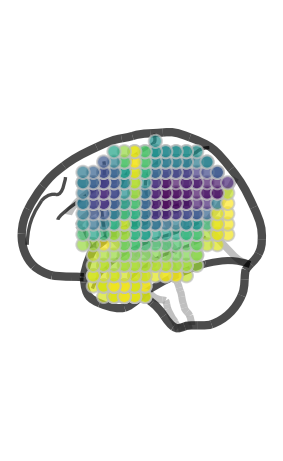

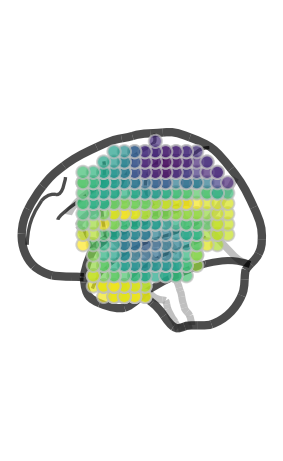

In [17]:
# example of good similarity with high overlap

# down for EC01 on last day
fig, axes = plt.subplots(figsize=(1.5, 2), dpi=300)
plt.tight_layout()
ax1 = axes
ex_pca = all_sbjs_pca[cur_freq_ind,0,-1,2]
first_component = ex_pca.components_[0,:]
df_elec_pos = roi_centroids[-1]
figu.plot_roi_contribs(ax1, first_component, df_elec_pos, node_size=10, colorbar=False)
plt.show()

# down for EC08 on last day
fig, axes = plt.subplots(figsize=(1.5, 2), dpi=300)
plt.tight_layout()
ax1 = axes
ex_pca = all_sbjs_pca[cur_freq_ind,7,-1,2]
first_component = ex_pca.components_[0,:]
df_elec_pos = roi_centroids[-1]
figu.plot_roi_contribs(ax1, first_component, df_elec_pos, node_size=10, colorbar=False)
plt.show()

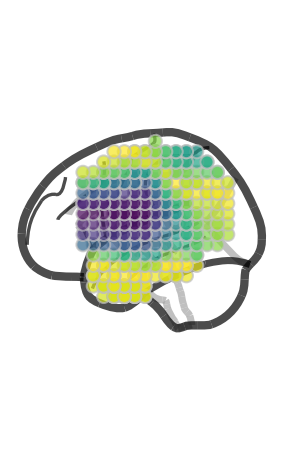

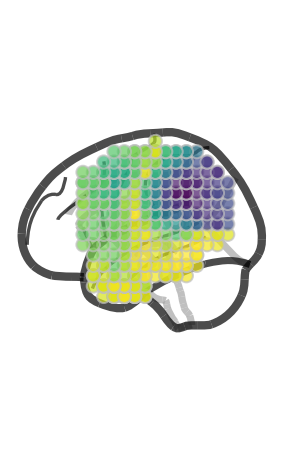

In [18]:
# example of low similarity and low overlap

# left for EC03
# didn't go with EC06 because their data looked wonky
fig, axes = plt.subplots(figsize=(1.5, 2), dpi=300)
plt.tight_layout()
ax1 = axes
ex_pca = all_sbjs_pca[cur_freq_ind,2,0,1]
first_component = ex_pca.components_[0,:]
df_elec_pos = roi_centroids[-1]
figu.plot_roi_contribs(ax1, first_component, df_elec_pos, node_size=10, colorbar=False)
plt.show()

# left for EC10
fig, axes = plt.subplots(figsize=(1.5, 2), dpi=300)
plt.tight_layout()
ax1 = axes
ex_pca = all_sbjs_pca[cur_freq_ind,9,0,1]
first_component = ex_pca.components_[0,:]
df_elec_pos = roi_centroids[-1]
figu.plot_roi_contribs(ax1, first_component, df_elec_pos, node_size=10, colorbar=False)
plt.show()

In [19]:
Q4_filt_data[(Q4_filt_data["Participant Comparison"] == "P01 vs P08") & 
            (Q4_filt_data["Movement"] == "down") &
            (Q4_filt_data["First Participant Day"] == '7') & 
            (Q4_filt_data["Second Participant Day"] == '7')]

,Unnamed: 0,Frequency,Movement,Participant Comparison,First Participant Day,Second Participant Day,Electrode Overlap,Neural Dissimilarity
279104,1904,Beta,down,P01 vs P08,7,7,0.768987,0.254098


In [20]:
Q4_filt_data[(Q4_filt_data["Participant Comparison"] == "P03 vs P10") & 
            (Q4_filt_data["Movement"] == "left") &
            (Q4_filt_data["First Participant Day"] == '3') & 
            (Q4_filt_data["Second Participant Day"] == '3')]

,Unnamed: 0,Frequency,Movement,Participant Comparison,First Participant Day,Second Participant Day,Electrode Overlap,Neural Dissimilarity
277755,555,Beta,left,P03 vs P10,3,3,0.256818,0.418633


### ROI Regions Plot

In [21]:
roi_contrib_df = pd.read_csv(exp_params['sp'] + exp_params['dataset'] + '/Q4_final/roi_region_contrib_df.csv')
roi_contrib_df

FileNotFoundError: [Errno 2] File /home/zsteineh/research_projects/neural_manifolds/results/nm/Q4_final/roi_region_contrib_df.csv does not exist: '/home/zsteineh/research_projects/neural_manifolds/results/nm/Q4_final/roi_region_contrib_df.csv'

In [ ]:
# filter out non-LFO freqs
roi_contrib_df_LFO = roi_contrib_df[roi_contrib_df['Frequency'] == cur_freq]
roi_contrib_df_LFO

,Unnamed: 0,Frequency,Participant,Day,Movement,PC Dimension,ROI Number,ROI Region,Contribution Weight
0,0,LFO,EC01,3,0,0,0,Temporal,0.079124
1,1,LFO,EC01,3,0,0,1,Temporal,0.071548
2,2,LFO,EC01,3,0,0,2,Temporal,0.078406
3,3,LFO,EC01,3,0,0,3,Temporal,0.076588
4,4,LFO,EC01,3,0,0,4,Temporal,0.053519
...,...,...,...,...,...,...,...,...,...
1268875,1268875,LFO,EC12,7,4,14,306,Precentral,0.103005
1268876,1268876,LFO,EC12,7,4,14,307,Precentral,0.115013
1268877,1268877,LFO,EC12,7,4,14,308,Frontal,0.112999
1268878,1268878,LFO,EC12,7,4,14,309,Frontal,0.080774


In [ ]:
print(roi_contrib_df_LFO.groupby('ROI Region').median()['Contribution Weight'].sort_values(ascending=False))
print(roi_contrib_df_LFO.groupby('ROI Region').std()['Contribution Weight'].sort_values(ascending=False))

ROI Region
Occipital        0.039345
Precentral       0.039211
Parietal         0.039193
Cerebellum       0.038643
Postcentral      0.038123
Frontal          0.037977
Angular          0.037369
SupraMarginal    0.036620
Temporal         0.035405
Fusiform         0.033120
Heschl           0.032952
Rolandic         0.031872
Name: Contribution Weight, dtype: float64


In [ ]:
roi_region_shorthand = {'Parietal': 'Par',
                        'Postcentral': 'PostC',
                        'Precentral': 'PreC',
                        'Occipital': 'Occ',
                        'Angular': 'Ang',
                        'Frontal': 'Fro',
                        'SupraMarginal': 'SupM',
                        'Temporal': 'Temp',
                        'Heschl': 'Hes',
                        'Rolandic': 'Rol',
                        'Cerebellum': 'Cer',
                        'Fusiform': 'Fus',
                        }

Index(['Occipital', 'Precentral', 'Parietal', 'Cerebellum', 'Postcentral',
       'Frontal', 'Angular', 'SupraMarginal', 'Temporal', 'Fusiform', 'Heschl',
       'Rolandic'],
      dtype='object', name='ROI Region')


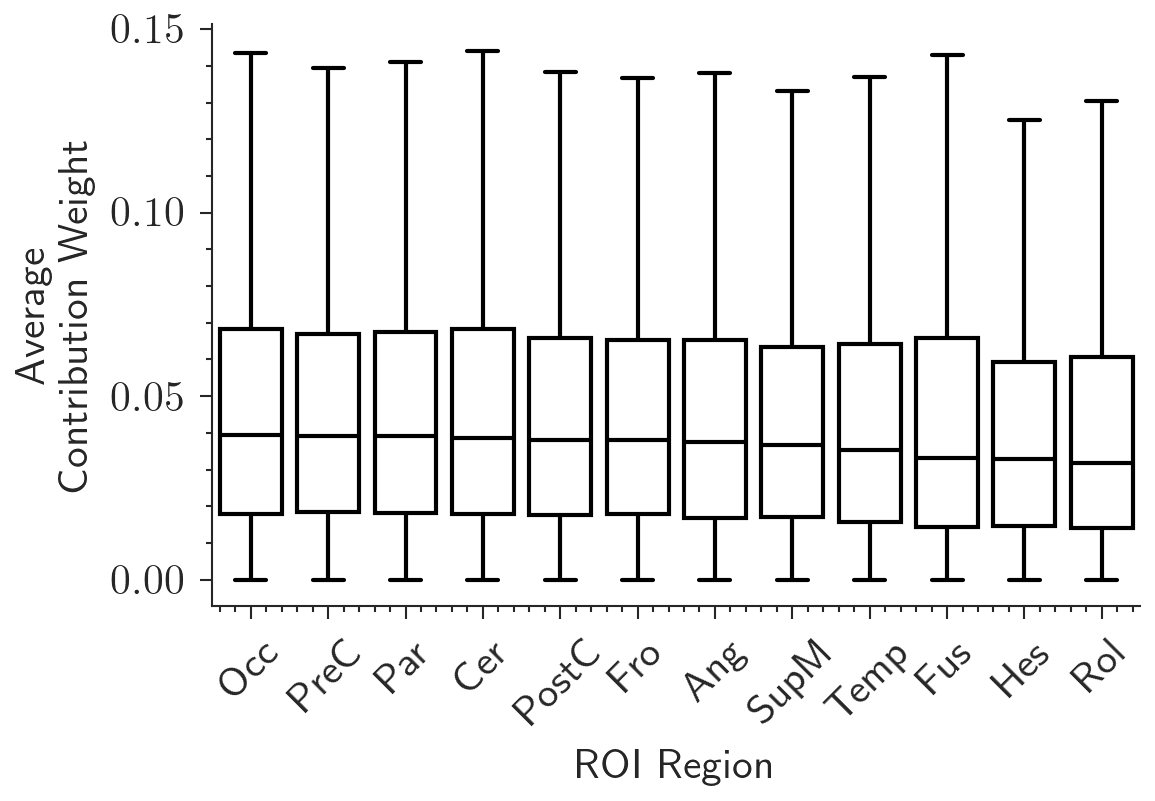

In [ ]:
fig, ax = plt.subplots(figsize=(3.75, 2.5), dpi = 300)
plt.tight_layout()
plt.rcParams.update({"font.size": 12})
order = roi_contrib_df_LFO.groupby('ROI Region').median()['Contribution Weight'].sort_values(ascending=False).index
print(order)
ax = sns.boxplot(x='ROI Region', 
            y='Contribution Weight', 
            data=roi_contrib_df_LFO, 
            order=order,
            ax=ax,
            color='white',
            showfliers=False)
# iterate over boxes
for i,box in enumerate(ax.artists):
    box.set_edgecolor('black')
    box.set_facecolor('white')

    # iterate over whiskers and median lines
    for j in range(5*i,5*(i+1)):
         ax.lines[j].set_color('black')

short_labels = [roi_region_shorthand[roi] for roi in order]
ax.set_xticklabels(labels=short_labels, rotation=45)
ax.set_ylabel("Average\nContribution Weight")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()